In [1]:
# load in cv2, install from:
# https://www.pyimagesearch.com/2016/12/19/install-opencv-3-on-macos-with-homebrew-the-easy-way/
import cv2
print(cv2.__version__)

3.4.0


In [4]:
# extract images from video

def extract_images(video_path: str, output_dir: str, interval: int = 5000) -> None:
    """
    Helper method that extracts frames from an input video. Has a default
    interval of 5s between frames, but can be set.
    :param video_path: str, absolute/relative video location
    :param output_dir: str, absolute/relative dir, must exist
    :param interval: int, time to wait in between frames, in milliseconds
    :returns: None
    """
    count = 0
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC, (count*5000))
        success, image = vidcap.read()
        print("Read a new frame: ", success)
        cv2.imwrite("{dir}/frame_{frame}.jpg".format(dir=output_dir,
                                                     frame=count), image)
        count += 1
        if count >= 30:
            print("Captured 30 frames, quitting.")
            break


In [6]:
# extract images, re-run with whatever parameters you want
extract_images("data/c9_faze_boston_major_map2_short.mp4", "data/test_dir2")

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Captured 30 frames, quitting.


In [89]:
# figure out where exactly the map is
from typing import List

from matplotlib import pyplot as plt
import numpy as np

class ColorMask(object):
    
    def __init__(self, lower: List, upper: List):
        """ Set the lower/upper. Raise exception if invalid. """
        print(lower)
        print(upper)
        assert type(lower) == tuple
        assert type(upper) == tuple
        assert len(lower) == 3
        assert len(upper) == 3

        self.lower = np.array(lower, dtype="uint8")
        self.upper = np.array(upper, dtype="uint8")


def pre_process_image(image_path: str):
    image = cv2.imread(image_path)
    map_image = image[50:290, 2:245]
    rgb_map = cv2.cvtColor(map_image, cv2.COLOR_BGR2RGB)
    blurred_rgb = cv2.GaussianBlur(rgb_map, (3, 3), 0)
    
    # convert to grayscale, threshold it 
    # GOOD FOR MAP SHAPE, BUT NOT DOTS
    gray = cv2.cvtColor(map_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    threshold = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    plt.imshow(blurred_rgb)
    plt.show()
    
    return blurred_rgb

def display_mask(image, mask: ColorMask) -> None:
    """
    Displays an image map for a given mask.
    :param image: np.array of RGB image
    :param mask: ColorMask object
    :returns: None
    """
    mask = cv2.inRange(image, mask.lower, mask.upper)
    output = cv2.bitwise_and(image, image, mask=mask)
    
    plt.imshow(output)
    plt.show()

def test_masks(image_path: str):
    test_boundaries = [
        ((47, 161, 189), (177, 237, 252)),
        ((47, 161, 189), (193, 223, 252)),
        ((47, 160, 170), (193, 223, 252)),
        ((47, 150, 170), (193, 223, 252)),

    ]
    
    color_masks = [ColorMask(
        boundary[0],
        boundary[1],
    ) for boundary in test_boundaries]
    
    rgb_map = pre_process_image(image_path)
    
    for mask in color_masks:
        display_mask(rgb_map, mask)


(47, 161, 189)
(177, 237, 252)
(47, 161, 189)
(193, 223, 252)
(47, 160, 170)
(193, 223, 252)
(47, 150, 170)
(193, 223, 252)


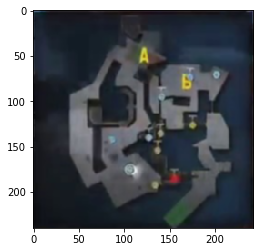

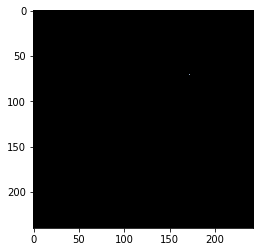

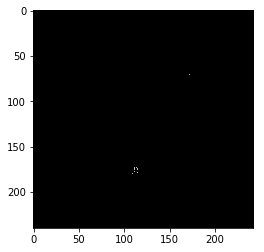

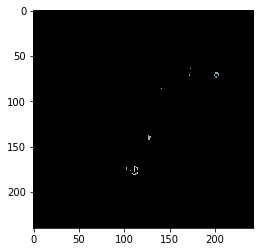

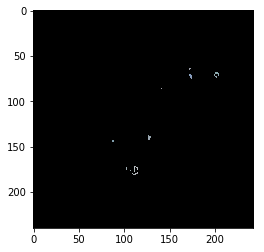

In [94]:
test_masks("data/test_dir2/frame_15.jpg")